In [16]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd

In [17]:
#Read the raw data in
M  = pd.read_csv('Mahalanobis_Example_1.csv')

In [25]:
#calculate ancilliary statistics
  #centroid of the data
Mw     = np.mean(M['W'])
Mh     = np.mean(M['H'])
print('Mean(W):  ', Mw)
print('Mean(H):  ', Mh)
  #covariance matrix
S = np.cov(M['W'],M['H'])
print('S is: \n',S)
  #most extreme x's
min_w = np.min(M['W'])
max_w = np.max(M['W'])
ex_w  = min_w if np.abs(min_w) > np.abs(max_w) else max_w
idx_w = np.where(M['W'] == ex_w)[0][0]
  #locate the 'outlier'
Out_w = M['W'].iloc[idx_w]
Out_h = M['H'].iloc[idx_w]
print('Out(W):  ', Out_w)
print('Out(H):  ', Out_h)
  #naive Z-scores
Stdw = np.std(M['W'])
Stdh = np.std(M['H'])
Zw = (Out_w - Mw)/Stdw
Zh = (Out_h - Mh)/Stdh
print(Zw,Zh)

Mean(W):   -0.172600686508044
Mean(H):   0.17708029312465146
S is: 
 [[78.29662631 63.08196815]
 [63.08196815 67.35298221]]
Out(W):   -22.109910673364368
Out(H):   -22.83313653428484
-2.4916913823203024 -2.817894301843987


In [19]:
#rotate the distribution
  #rotation amount
rot = 1.0/np.sqrt(2.0)
M['X'] =  rot*M['W'] + rot*M['H']
M['Y'] =  rot*M['W'] - rot*M['H']
Mx     = np.mean(M['X'])
My     = np.mean(M['Y'])
Stdx   = np.std(M['X'])
Stdy   = np.std(M['Y'])
  #outlier in new coords
Out_x = M['X'].iloc[idx_w]
Out_y = M['Y'].iloc[idx_w]
  #diagonalized Z-score
RZx = (M['X'].iloc[idx_w] - Mx)/Stdx
RZy = (M['Y'].iloc[idx_w] - My)/Stdy
print(RZx,RZy)

-2.740013204109833 0.2442793302366915


In [20]:
#calculate the distances for the outlier point in both W-H and X-Y coords to 
#make sure that they are the same
dist_out_WH = np.sqrt( (Out_w - Mw)**2 + (Out_h - Mh)**2 )
dist_out_XY = np.sqrt( (Out_x - Mx)**2 + (Out_y - My)**2 )
print(dist_out_WH,dist_out_XY)

31.79175440116234 31.79175440116234


In [29]:
#insert the new point
X = 0 + Mx
Y = 31.79 + My
W = rot*X - rot*Y
H = rot*X + rot*Y
print('New point location in W and H:', W, H)

#find its distance from the centroid in X-Y coordinates

print('Distance of new from centroid', np.sqrt( (X - Mx)**2 + (Y - My)**2 ) )

#calculate the corresponding Z-score in W-H
Z_new_w = (W - Mw)/Stdw
Z_new_h = (H - Mh)/Stdh
print('New point Z-scores (W-H):', Z_new_w,Z_new_h)

#calculate the corresponding Z-score in X-Y
Z_new_x = X/Stdx
Z_new_y = Y/Stdy
print('New point Z-Scores (X-Y)',Z_new_x,Z_new_y)

New point location in W and H: -22.30184428079569 22.306323887412297
Distance of new from centroid 31.79
New point Z-scores (W-H): -2.513491653907877 2.710007901975994
New point Z-Scores (X-Y) 0.0002730780122661961 10.156383603256174


In [14]:
#compare Mahalanois distance in W-H (i.e. diagonalization 'automatically' done)
O_ex  = np.array([Out_w-Mw,Out_h-Mh])
O_new = np.array([W-Mw,H-Mh])

Maha_ex  = np.sqrt(np.matmul(O_ex.transpose(),np.matmul(np.linalg.inv(S),O_ex)))
Maha_new = np.sqrt(np.matmul(O_new.transpose(),np.matmul(np.linalg.inv(S),O_new)))
print(Maha_ex,Maha_new)



2.8051535286094285 10.141573665553803


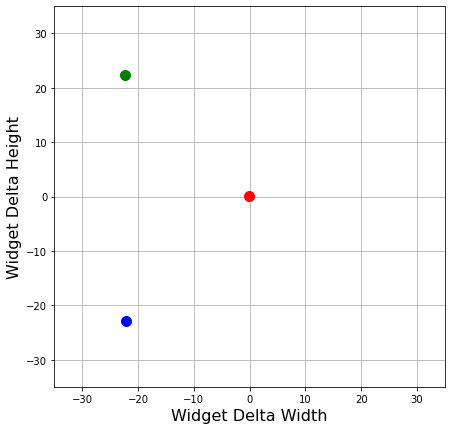

In [7]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1,1,1)
ax.plot(M['W'].iloc[idx_w],M['H'].iloc[idx_w],color='blue',marker='o',markersize=10)
ax.plot(Mw,Mh,color='red',marker='o',markersize=10)
plt.plot(W,H,color='green',marker='o',markersize=10)
ax.set_xlim([-35,35])
ax.set_ylim([-35,35])
ax.set_xlabel('Widget Delta Width', fontsize=16)
ax.set_ylabel('Widget Delta Height',fontsize=16)
ax.grid('on')
#fig.savefig('three_points.png')

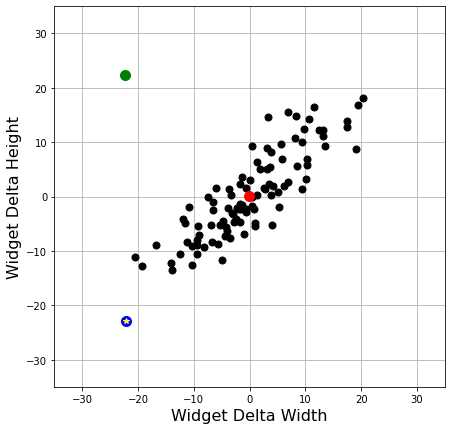

In [8]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1,1,1)
ax.plot(M['W'],M['H'],color='black',marker='o',markersize=7,linestyle='none')
ax.plot(M['W'].iloc[idx_w],M['H'].iloc[idx_w],color='blue',marker='o',markersize=10)
ax.plot(M['W'].iloc[idx_w],M['H'].iloc[idx_w],color='yellow',marker='*')
ax.plot(Mw,Mh,color='red',marker='o',markersize=10)
ax.plot(W,H,color='green',marker='o',markersize=10)
ax.set_xlim([-35,35])
ax.set_ylim([-35,35])
ax.set_xlabel('Widget Delta Width', fontsize=16)
ax.set_ylabel('Widget Delta Height',fontsize=16)
ax.grid('on')
#fig.savefig('widget_distribution_with_new_point')

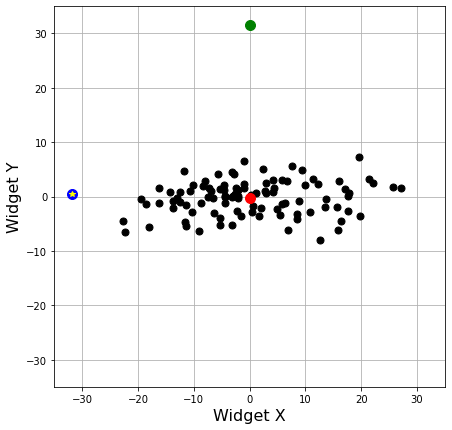

In [12]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1,1,1)
ax.plot(M['X'],M['Y'],color='black',marker='o',markersize=7,linestyle='none')
ax.plot(M['X'].iloc[idx_w],M['Y'].iloc[idx_w],color='blue',marker='o',markersize=10)
ax.plot(M['X'].iloc[idx_w],M['Y'].iloc[idx_w],color='yellow',marker='*')
ax.plot(Mx,My,color='red',marker='o',markersize=10)
ax.plot(X,Y,color='green',marker='o',markersize=10)
ax.set_xlim([-35,35])
ax.set_ylim([-35,35])
ax.set_xlabel('Widget X',fontsize=16)
ax.set_ylabel('Widget Y',fontsize=16)
ax.grid('on')
#fig.savefig('rotated_widget.png')

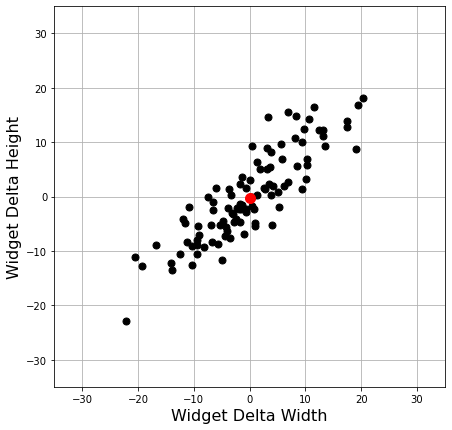

In [28]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1,1,1)
ax.plot(M['W'],M['H'],color='black',marker='o',markersize=7,linestyle='none')
ax.plot(Mx,My,color='red',marker='o',markersize=10)
ax.set_xlim([-35,35])
ax.set_ylim([-35,35])
ax.set_xlabel('Widget Delta Width', fontsize=16)
ax.set_ylabel('Widget Delta Height',fontsize=16)
ax.grid('on')
#fig.savefig('widget_distribution.png')

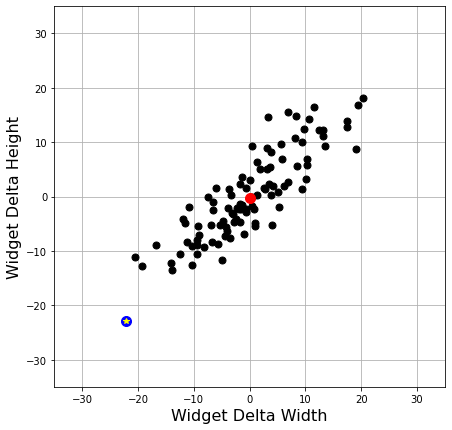

In [29]:
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(1,1,1)
ax.plot(M['W'],M['H'],color='black',marker='o',markersize=7,linestyle='none')
ax.plot(M['W'].iloc[idx_w],M['H'].iloc[idx_w],color='blue',marker='o',markersize=10)
ax.plot(M['W'].iloc[idx_w],M['H'].iloc[idx_w],color='yellow',marker='*')
ax.plot(Mx,My,color='red',marker='o',markersize=10)
ax.set_xlim([-35,35])
ax.set_ylim([-35,35])
ax.set_xlabel('Widget Delta Width', fontsize=16)
ax.set_ylabel('Widget Delta Height',fontsize=16)
ax.grid('on')
#fig.savefig('widget_distribition_with_outlier.png')